In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score

from tqdm import tqdm
from math import log10

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics import top_k_accuracy_score
from sklearn.feature_selection import f_classif, f_regression

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Get top 10 features for sat prediction 

In [14]:
runtimes = pd.read_excel('C:/Users/Jasmin/Documents/MSc-Thesis/Data/Runtime/conf_all_mipverify.xlsm')
runtimes

,SampleNumber,SolveStatus_default,ObjectiveValue_default,ObjectiveBound_default,SolveStatus_default-2,ObjectiveValue_default-2,ObjectiveBound_default-2,SolveStatus_conf1,ObjectiveValue_conf1,ObjectiveBound_conf1,SolveStatus_conf1-2,ObjectiveValue_conf1-2,ObjectiveBound_conf1-2,min,is_infeasible,is_optimal
0,1,Optimal,0.042871,4.287053e-02,Optimal,0.042871,4.287086e-02,Optimal,0.042871,4.287031e-02,Optimal,0.042871,4.287031e-02,900.588016,0,1
1,6596,InfeasibleOrUnbounded,NaN,1.000000e+100,InfeasibleOrUnbounded,NaN,1.000000e+100,Infeasible,NaN,1.000000e+100,Infeasible,NaN,1.000000e+100,0.309388,1,0
2,2,Optimal,0.034040,3.403654e-02,Optimal,0.034040,3.403654e-02,Optimal,0.034040,3.403951e-02,Optimal,0.034040,3.403951e-02,253.150349,0,1
3,3,Optimal,0.022136,2.213556e-02,Optimal,0.022136,2.213375e-02,UserLimit,0.022136,1.499603e-02,Optimal,0.022136,2.213556e-02,2516.195079,0,1
4,5,Optimal,0.025190,2.518972e-02,Optimal,0.025190,2.518972e-02,Optimal,0.025190,2.518972e-02,Optimal,0.025190,2.518972e-02,150.256068,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Optimal,0.028346,2.834423e-02,Optimal,0.028346,2.834639e-02,Optimal,0.028346,2.834639e-02,Optimal,0.028346,2.834639e-02,169.452856,0,1
9996,6905,InfeasibleOrUnbounded,NaN,1.000000e+100,InfeasibleOrUnbounded,NaN,1.000000e+100,Infeasible,NaN,1.000000e+100,Infeasible,NaN,1.000000e+100,13.909193,1,0
9997,9997,Optimal,0.044925,4.492504e-02,Optimal,0.044925,4.492504e-02,Optimal,0.044925,4.492504e-02,Optimal,0.044925,4.492504e-02,809.385036,0,1
9998,9998,Optimal,0.037941,3.793798e-02,Optimal,0.037941,3.793930e-02,Optimal,0.037941,3.793847e-02,Optimal,0.037941,3.794149e-02,693.443052,0,1


In [15]:
runtimes['SolveStatus_default'].value_counts()

Optimal                  6859
InfeasibleOrUnbounded    2984
UserLimit                 157
Name: SolveStatus_default, dtype: int64

In [16]:
df = pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/mnistnet_ARP_data.csv')
df

,n_vars,n_constr,n_nzcnt,nq_vars,nq_constr,nq_nzcnt,lp_avg,lp_l2_avg,lp_linf,lp_objval,...,impliedBoundCuts,flowCuts,mixedIntegerRoundingCuts,gomoryFractionalCuts,time_relax,time_VCG0,time_VCG1,time_VCG2,cplex_prob_time,INSTANCE_NAME
0,2611.0,3652.0,224857.0,0.0,0.0,0.0,0.052958,0.134017,0.482776,0.000000,...,4.0,0.0,2.0,2.0,1.983330,0.016667,0.083333,0.083333,43.70000,mip_1.txt
1,2475.0,3380.0,111531.0,0.0,0.0,0.0,0.224460,0.307240,0.499756,0.017397,...,3.0,1.0,21.0,6.0,15.600000,0.000000,0.050000,0.050000,25.11670,mip_10.txt
2,2517.0,3464.0,31950.0,0.0,0.0,0.0,0.228773,0.299976,0.486992,0.016900,...,34.0,35.0,36.0,16.0,0.783333,0.000000,0.016667,0.016667,116.95000,mip_100.txt
3,2699.0,3828.0,65829.0,0.0,0.0,0.0,0.046683,0.131895,0.490389,0.000000,...,48.0,0.0,14.0,6.0,1.283330,0.000000,0.033333,0.033333,136.18300,mip_1000.txt
4,2405.0,3240.0,54838.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mip_10000.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2621.0,3672.0,234098.0,0.0,0.0,0.0,0.052234,0.139483,0.475374,0.000000,...,0.0,0.0,8.0,5.0,0.650000,0.000000,0.083333,0.100000,67.28330,mip_9995.txt
9996,2443.0,3316.0,85627.0,0.0,0.0,0.0,0.097075,0.145755,0.458368,0.045832,...,2.0,1.0,15.0,25.0,10.266700,0.000000,0.033333,0.050000,4.26667,mip_9996.txt
9997,2519.0,3468.0,147779.0,0.0,0.0,0.0,0.116059,0.199844,0.485940,0.000000,...,3.0,0.0,7.0,4.0,5.966670,0.000000,0.066667,0.050000,34.18330,mip_9997.txt
9998,2639.0,3708.0,244729.0,0.0,0.0,0.0,0.043281,0.125443,0.479886,0.000000,...,13.0,0.0,7.0,6.0,1.933330,0.000000,0.100000,0.083333,68.53330,mip_9998.txt


In [17]:
df['INSTANCE_NAME'] = df['INSTANCE_NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
lp_list = list(df['INSTANCE_NAME'])
runtimes = runtimes.loc[runtimes['SampleNumber'].isin(lp_list)]
df = df.rename(columns={"INSTANCE_NAME": "SampleNumber"})
## Join the two datasets by samplenumber/lp_file
df = pd.merge(df, runtimes, on="SampleNumber")
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df = df.drop(cols_to_drop, axis=1)
df = df.T.drop_duplicates().T
df

,n_vars,n_constr,n_nzcnt,lp_avg,lp_l2_avg,lp_linf,lp_objval,num_i_variables,num_c_variables,ratio_i_variables,...,ObjectiveBound_default-2,SolveStatus_conf1,ObjectiveValue_conf1,ObjectiveBound_conf1,SolveStatus_conf1-2,ObjectiveValue_conf1-2,ObjectiveBound_conf1-2,min,is_infeasible,is_optimal
0,2611.0,3652.0,224857.0,0.052958,0.134017,0.482776,0.0,133.0,2478.0,0.050938,...,0.042871,Optimal,0.042871,0.04287,Optimal,0.042871,0.04287,900.588016,0,1
1,2475.0,3380.0,111531.0,0.22446,0.30724,0.499756,0.017397,65.0,2410.0,0.026263,...,1000000000000000015902891109759918046836080856...,Infeasible,NaN,1000000000000000015902891109759918046836080856...,Infeasible,NaN,1000000000000000015902891109759918046836080856...,17.654137,1,0
2,2517.0,3464.0,31950.0,0.228773,0.299976,0.486992,0.0169,86.0,2431.0,0.034168,...,0.049376,Optimal,0.049378,0.049373,Optimal,0.049378,0.049373,14.764228,0,1
3,2699.0,3828.0,65829.0,0.046683,0.131895,0.490389,0.0,177.0,2522.0,0.06558,...,0.032203,Optimal,0.032205,0.032202,Optimal,0.032205,0.032202,728.792111,0,1
4,2405.0,3240.0,54838.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1000000000000000015902891109759918046836080856...,Infeasible,NaN,1000000000000000015902891109759918046836080856...,Infeasible,NaN,1000000000000000015902891109759918046836080856...,0.246379,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2621.0,3672.0,234098.0,0.052234,0.139483,0.475374,0.0,138.0,2483.0,0.052652,...,0.028346,Optimal,0.028346,0.028346,Optimal,0.028346,0.028346,169.452856,0,1
9996,2443.0,3316.0,85627.0,0.097075,0.145755,0.458368,0.045832,49.0,2394.0,0.020057,...,1000000000000000015902891109759918046836080856...,Infeasible,NaN,1000000000000000015902891109759918046836080856...,Infeasible,NaN,1000000000000000015902891109759918046836080856...,1.18708,1,0
9997,2519.0,3468.0,147779.0,0.116059,0.199844,0.48594,0.0,87.0,2432.0,0.034537,...,0.044925,Optimal,0.044925,0.044925,Optimal,0.044925,0.044925,809.385036,0,1
9998,2639.0,3708.0,244729.0,0.043281,0.125443,0.479886,0.0,147.0,2492.0,0.055703,...,0.037939,Optimal,0.037941,0.037938,Optimal,0.037941,0.037941,693.443052,0,1


In [12]:
101 - 16

85

In [18]:
df['SolveStatus_default'].value_counts()

Optimal                  6859
InfeasibleOrUnbounded    2984
UserLimit                 157
Name: SolveStatus_default, dtype: int64

In [19]:
df['SolveStatus_default-2'].value_counts()

Optimal                  6487
InfeasibleOrUnbounded    2972
UserLimit                 541
Name: SolveStatus_default-2, dtype: int64

In [20]:
df = df.fillna(-1)

Optimal                  3429
InfeasibleOrUnbounded    1492
UserLimit                  79
Name: SolveStatus_default, dtype: int64
Optimal                  3430
InfeasibleOrUnbounded    1492
UserLimit                  78
Name: SolveStatus_default, dtype: int64
training accuracy: 1.0
test accuracy: 0.9494
[[1335    0  157]
 [   0   12   66]
 [  20   10 3400]]


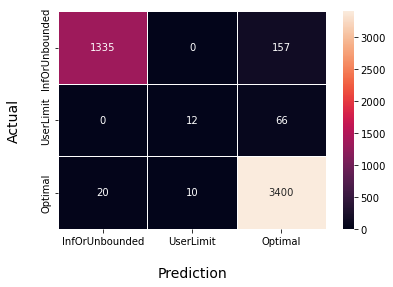

,new_col,vcg_var_weight1_avg,new_row,lp_linf,vcg_var_weight2_avg,lp_objval,vcg_constr_weight2_avg,time_relax,cplex_prob_time,nodecnt
0,0.081073,0.06275,0.062071,0.055732,0.042426,0.037787,0.035628,0.035094,0.034983,0.027613


In [21]:
#### SOLVER STATUS DEFAULT
X = df.drop(['SampleNumber', 'SolveStatus_default',	'ObjectiveValue_default', 'ObjectiveBound_default',
             	'SolveStatus_default-2', 'ObjectiveValue_default-2', 'ObjectiveBound_default-2', 'SolveStatus_conf1',
                    	'ObjectiveValue_conf1', 'ObjectiveBound_conf1', 'SolveStatus_conf1-2', 'ObjectiveValue_conf1-2', 'ObjectiveBound_conf1-2',
                        'min', 'is_infeasible', 'is_optimal'], axis = 1)

y = df['SolveStatus_default']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
#print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds, labels=['InfeasibleOrUnbounded', 'UserLimit', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10).T

In [22]:
df

,n_vars,n_constr,n_nzcnt,lp_avg,lp_l2_avg,lp_linf,lp_objval,num_i_variables,num_c_variables,ratio_i_variables,...,ObjectiveBound_default-2,SolveStatus_conf1,ObjectiveValue_conf1,ObjectiveBound_conf1,SolveStatus_conf1-2,ObjectiveValue_conf1-2,ObjectiveBound_conf1-2,min,is_infeasible,is_optimal
0,2611.0,3652.0,224857.0,0.052958,0.134017,0.482776,0.000000,133.0,2478.0,0.050938,...,4.287086e-02,Optimal,0.042871,4.287031e-02,Optimal,0.042871,4.287031e-02,900.588016,0,1
1,2475.0,3380.0,111531.0,0.224460,0.307240,0.499756,0.017397,65.0,2410.0,0.026263,...,1.000000e+100,Infeasible,-1.000000,1.000000e+100,Infeasible,-1.000000,1.000000e+100,17.654137,1,0
2,2517.0,3464.0,31950.0,0.228773,0.299976,0.486992,0.016900,86.0,2431.0,0.034168,...,4.937605e-02,Optimal,0.049378,4.937286e-02,Optimal,0.049378,4.937286e-02,14.764228,0,1
3,2699.0,3828.0,65829.0,0.046683,0.131895,0.490389,0.000000,177.0,2522.0,0.065580,...,3.220261e-02,Optimal,0.032205,3.220212e-02,Optimal,0.032205,3.220212e-02,728.792111,0,1
4,2405.0,3240.0,54838.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,...,1.000000e+100,Infeasible,-1.000000,1.000000e+100,Infeasible,-1.000000,1.000000e+100,0.246379,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2621.0,3672.0,234098.0,0.052234,0.139483,0.475374,0.000000,138.0,2483.0,0.052652,...,2.834639e-02,Optimal,0.028346,2.834639e-02,Optimal,0.028346,2.834639e-02,169.452856,0,1
9996,2443.0,3316.0,85627.0,0.097075,0.145755,0.458368,0.045832,49.0,2394.0,0.020057,...,1.000000e+100,Infeasible,-1.000000,1.000000e+100,Infeasible,-1.000000,1.000000e+100,1.187080,1,0
9997,2519.0,3468.0,147779.0,0.116059,0.199844,0.485940,0.000000,87.0,2432.0,0.034537,...,4.492504e-02,Optimal,0.044925,4.492504e-02,Optimal,0.044925,4.492504e-02,809.385036,0,1
9998,2639.0,3708.0,244729.0,0.043281,0.125443,0.479886,0.000000,147.0,2492.0,0.055703,...,3.793930e-02,Optimal,0.037941,3.793847e-02,Optimal,0.037941,3.794149e-02,693.443052,0,1


Optimal                  6859
InfeasibleOrUnbounded    2984
Name: SolveStatus_default, dtype: int64
Optimal                  3429
InfeasibleOrUnbounded    1492
Name: SolveStatus_default, dtype: int64
Optimal                  3430
InfeasibleOrUnbounded    1492
Name: SolveStatus_default, dtype: int64
training accuracy: 1.0
test accuracy: 0.9636326696464852
f1 score: 0.9744102930664761
[[1335  157]
 [  22 3408]]


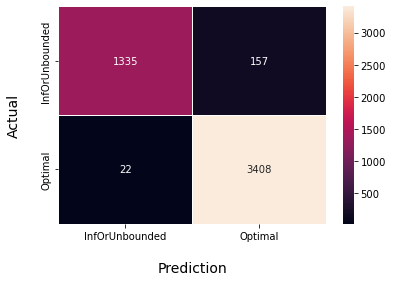

,new_row,vcg_var_weight2_avg,time_relax,vcg_var_weight1_avg,lp_linf,new_col,lp_objval,rhs_c_1_varcoef,vcg_var_deg2_varcoef,cplex_prob_time
0,0.086764,0.065176,0.049124,0.04526,0.044942,0.037346,0.034191,0.030404,0.029752,0.028693


In [23]:
## Without UserLimit
#### SOLVER STATUS DEFAULT
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score


df_no_ul = df[df.SolveStatus_default != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_default'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveStatus_default',	'ObjectiveValue_default', 'ObjectiveBound_default',
             	'SolveStatus_default-2', 'ObjectiveValue_default-2', 'ObjectiveBound_default-2', 'SolveStatus_conf1',
                    	'ObjectiveValue_conf1', 'ObjectiveBound_conf1', 'SolveStatus_conf1-2', 'ObjectiveValue_conf1-2', 'ObjectiveBound_conf1-2',
                        'min', 'is_infeasible', 'is_optimal'], axis = 1)

y = df_no_ul['SolveStatus_default']

training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds, pos_label='Optimal'))


c_array = confusion_matrix(testing_labels, preds, labels=['InfeasibleOrUnbounded', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Binary Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10).T

Optimal       3284
Infeasible    1493
UserLimit      223
Name: SolveStatus_conf1, dtype: int64
Optimal       3284
Infeasible    1492
UserLimit      224
Name: SolveStatus_conf1, dtype: int64
training accuracy: 1.0
test accuracy: 0.9282
[[1357    0  135]
 [   0   44  180]
 [  18   26 3240]]


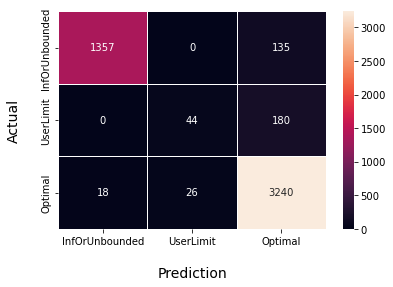

,lp_linf,lp_objval,vcg_constr_weight1_avg,cplex_prob_time,time_relax,rhs_c_1_varcoef,new_col,time_VCG1,vcg_constr_weight0_varcoef,rhs_c_2_avg
0,0.045868,0.038356,0.032373,0.029807,0.02805,0.027263,0.026769,0.023193,0.023169,0.023054


In [25]:
#### SOLVER STATUS c1
X = df.drop(['SampleNumber', 'SolveStatus_default',	'ObjectiveValue_default', 'ObjectiveBound_default',
             	'SolveStatus_default-2', 'ObjectiveValue_default-2', 'ObjectiveBound_default-2', 'SolveStatus_conf1',
                    	'ObjectiveValue_conf1', 'ObjectiveBound_conf1', 'SolveStatus_conf1-2', 'ObjectiveValue_conf1-2', 'ObjectiveBound_conf1-2',
                        'min', 'is_infeasible', 'is_optimal'], axis = 1)

y = df['SolveStatus_conf1']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
#print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds, labels=['Infeasible', 'UserLimit', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10).T

Optimal       6568
Infeasible    2985
Name: SolveStatus_conf1, dtype: int64
Optimal       3284
Infeasible    1492
Name: SolveStatus_conf1, dtype: int64
Optimal       3284
Infeasible    1493
Name: SolveStatus_conf1, dtype: int64
training accuracy: 1.0
test accuracy: 0.967134184634708
f1 score: 0.9765145848915483
[[1356  137]
 [  20 3264]]


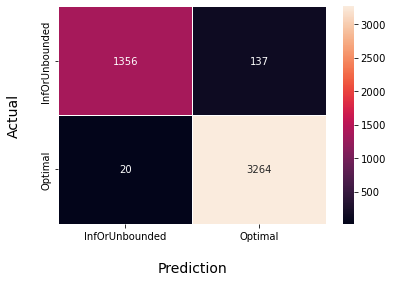

,vcg_var_weight2_avg,vcg_constr_weight1_avg,lp_linf,time_relax,cplex_prob_time,lp_objval,time_VCG1,lp_avg,new_row,new_col
0,0.063571,0.057124,0.056711,0.056123,0.042208,0.035015,0.034157,0.032917,0.029525,0.029512


In [26]:
## Without UserLimit
#### SOLVER STATUS c1
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score


df_no_ul = df[df.SolveStatus_conf1 != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_conf1'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveStatus_default',	'ObjectiveValue_default', 'ObjectiveBound_default',
             	'SolveStatus_default-2', 'ObjectiveValue_default-2', 'ObjectiveBound_default-2', 'SolveStatus_conf1',
                    	'ObjectiveValue_conf1', 'ObjectiveBound_conf1', 'SolveStatus_conf1-2', 'ObjectiveValue_conf1-2', 'ObjectiveBound_conf1-2',
                        'min', 'is_infeasible', 'is_optimal'], axis = 1)

y = df_no_ul['SolveStatus_conf1']

training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds, pos_label='Optimal'))


c_array = confusion_matrix(testing_labels, preds, labels=['Infeasible', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Binary Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10).T

## Principle Component analysis

In [19]:
X = df.drop(['SampleNumber', 'SolveStatus_default',	'ObjectiveValue_default', 'ObjectiveBound_default',
             	'SolveStatus_default-2', 'ObjectiveValue_default-2', 'ObjectiveBound_default-2', 'SolveStatus_conf1',
                    	'ObjectiveValue_conf1', 'ObjectiveBound_conf1', 'SolveStatus_conf1-2', 'ObjectiveValue_conf1-2', 'ObjectiveBound_conf1-2',
                        'min', 'is_infeasible', 'is_optimal'], axis = 1)


y =  df['SolveStatus_default']

x_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pcs = pca.fit_transform(x_scaled)


pcaDF = pd.DataFrame(data = pcs, columns = ['principal component 1', 'principal component 2'])
print(pcaDF)

print(pca.components_)

# ratio of the total variance each principal component captures.
print(sum(pca.explained_variance_ratio_))

dfpca = pd.concat([pcaDF, y], axis = 1)
dfpca

      principal component 1  principal component 2
0                 -4.267470               3.651162
1                 -3.855254               0.335486
2                 -3.961848              -5.408028
3                 -3.918603              -2.581758
4                 14.312866               0.157410
...                     ...                    ...
9995              -4.535497               3.810852
9996              -3.500136              -0.491878
9997              -3.633056               1.472586
9998              -4.971028               3.531550
9999              -3.779651               1.857274

[10000 rows x 2 columns]
[[-8.19974028e-02 -8.19975633e-02 -3.99021293e-02 -1.29152223e-01
  -1.29382199e-01 -1.30341574e-01 -1.30317530e-01 -1.04188551e-01
  -1.30528507e-01 -1.30505495e-01 -1.30195903e-01 -1.20294501e-01
  -1.30028686e-01 -1.29549207e-01 -1.27540135e-01 -1.30332213e-01
  -3.39074242e-04 -1.30512315e-01 -1.17566663e-01 -1.14219112e-01
  -1.29969932e-01 -1.06376793e-0

,principal component 1,principal component 2,SolveStatus_default
0,-4.267470,3.651162,Optimal
1,-3.855254,0.335486,InfeasibleOrUnbounded
2,-3.961848,-5.408028,Optimal
3,-3.918603,-2.581758,Optimal
4,14.312866,0.157410,InfeasibleOrUnbounded
...,...,...,...
9995,-4.535497,3.810852,Optimal
9996,-3.500136,-0.491878,InfeasibleOrUnbounded
9997,-3.633056,1.472586,Optimal
9998,-4.971028,3.531550,Optimal


In [20]:
modified_dfpca = dfpca.drop(dfpca[dfpca['principal component 2'] > 150].index)

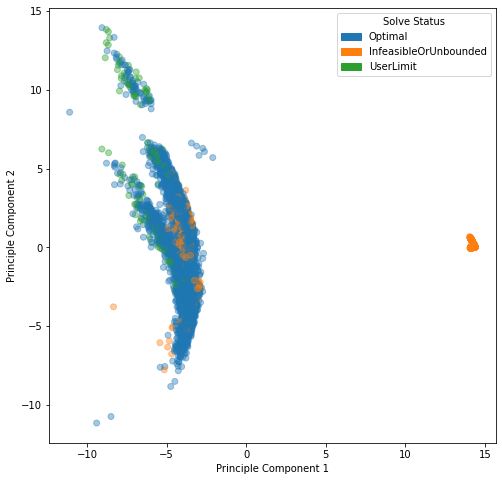

In [21]:
import matplotlib.patches

#####################
#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 

fig = plt.figure(figsize = (8,8))
levels, categories = pd.factorize(modified_dfpca['SolveStatus_default'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]


plt.scatter(modified_dfpca['principal component 1'], 
           modified_dfpca['principal component 2'],c=colors, alpha=0.4)
plt.gca().set(xlabel='Principle Component 1', ylabel='Principle Component 2')
plt.legend(handles=handles, title='Solve Status')

In [22]:
X = df.drop(['SampleNumber', 'SolveStatus_default',	'ObjectiveValue_default', 'ObjectiveBound_default',
             	'SolveStatus_default-2', 'ObjectiveValue_default-2', 'ObjectiveBound_default-2', 'SolveStatus_conf1',
                    	'ObjectiveValue_conf1', 'ObjectiveBound_conf1', 'SolveStatus_conf1-2', 'ObjectiveValue_conf1-2', 'ObjectiveBound_conf1-2',
                        'min', 'is_infeasible', 'is_optimal'], axis = 1)


y = df['SolveStatus_default']
x_scaled = StandardScaler().fit_transform(X)

EVR = []
nlist = []
for n in range(40):
    pca = PCA(n_components=n)
    pca.fit_transform(x_scaled)
    # ratio of the total variance each principal component captures.
    print(sum(pca.explained_variance_ratio_))
    EVR.append(sum(pca.explained_variance_ratio_))
    nlist.append(n)

0
0.6872938245749756
0.7799960437220846
0.8338939532791148
0.8534624225897669
0.869320669570611
0.8834926069282618
0.8969252412115695
0.9099608920370379
0.9217203739181857
0.932357505838308
0.9427373404618626
0.9514707971576271
0.9594220864699016
0.9663685967079688
0.9728687123081687
0.9782342542278013
0.9827570601510491
0.9869915029273016
0.9906083013149006
0.9929724685672707
0.9947182546555392
0.9960491901202715
0.9970336343053531
0.9977682087618649
0.9983294650409508
0.9987883752554496
0.99909603638618
0.9992960745955713
0.999478897554742
0.9996345155770341
0.9997268483539056
0.9997858087085975
0.9998423231980779
0.9998775114556909
0.9999096542213924
0.9999340418420842
0.9999526534326221
0.9999605818459743
0.9999679252731944


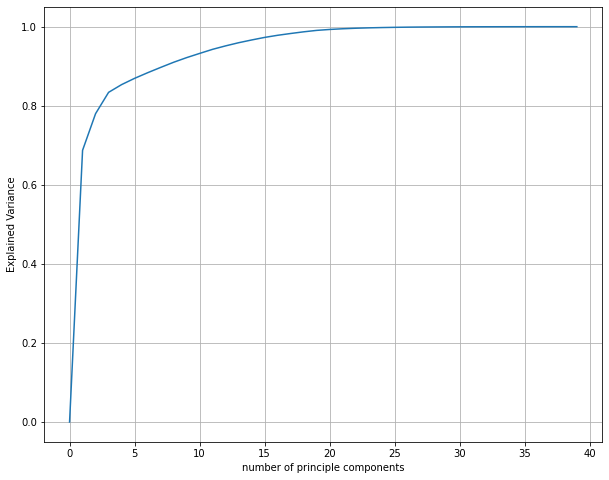

In [23]:
plt.figure(figsize=(10,8))
plt.plot(nlist, EVR)
plt.xticks(np.arange(0, 41, step=5))
plt.xlabel('number of principle components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

Optimal                  6859
InfeasibleOrUnbounded    2984
Name: SolveStatus_default, dtype: int64
      principal component 1  principal component 2
0                 -4.382316               3.814833
1                 -3.922438               0.745931
2                 -4.019052              -5.236428
3                 -4.006513              -2.679474
4                 14.213780               0.128253
...                     ...                    ...
9838              -4.656517               3.937347
9839              -3.559474              -0.081302
9840              -3.718551               1.737193
9841              -5.086309               3.798542
9842              -3.873543               2.115621

[9843 rows x 2 columns]
[[-8.23587065e-02 -8.23588800e-02 -3.88405222e-02 -1.28905795e-01
  -1.29136948e-01 -1.30062710e-01 -1.30042747e-01 -1.04846210e-01
  -1.30215488e-01 -1.30199961e-01 -1.29942131e-01 -1.20956769e-01
  -1.29729113e-01 -1.29333371e-01 -1.27342136e-01 -1.30060759e-01

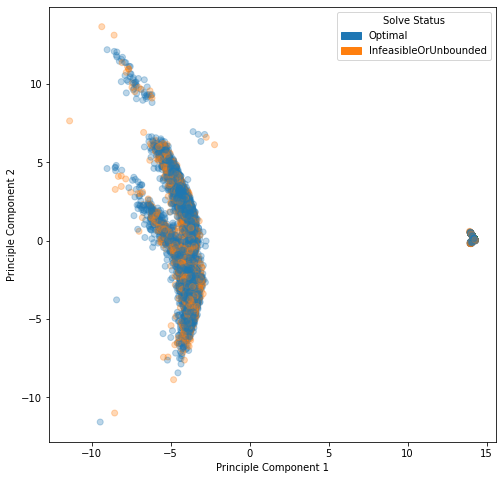

In [24]:
# Remove timeouts
df_no_ul = df[df.SolveStatus_default != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_default'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveStatus_default',	'ObjectiveValue_default', 'ObjectiveBound_default',
             	'SolveStatus_default-2', 'ObjectiveValue_default-2', 'ObjectiveBound_default-2', 'SolveStatus_conf1',
                    	'ObjectiveValue_conf1', 'ObjectiveBound_conf1', 'SolveStatus_conf1-2', 'ObjectiveValue_conf1-2', 'ObjectiveBound_conf1-2',
                        'min', 'is_infeasible', 'is_optimal'], axis = 1)
y = df_no_ul['SolveStatus_default']

x_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pcs = pca.fit_transform(x_scaled)


pcaDF = pd.DataFrame(data = pcs, columns = ['principal component 1', 'principal component 2'])
print(pcaDF)

print(pca.components_)

# ratio of the total variance each principal component captures.
print(sum(pca.explained_variance_ratio_))

dfpca = pd.concat([pcaDF, y], axis = 1)
dfpca


modified_dfpca = dfpca.drop(dfpca[dfpca['principal component 2'] > 150].index)


fig = plt.figure(figsize = (8,8))
levels, categories = pd.factorize(modified_dfpca['SolveStatus_default'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]


plt.scatter(modified_dfpca['principal component 1'], 
           modified_dfpca['principal component 2'],c=colors, alpha=0.3)
plt.gca().set(xlabel='Principle Component 1', ylabel='Principle Component 2')
plt.legend(handles=handles, title='Solve Status')

